In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


#### The goal of this section is to perform exploratory data analysis on the combined dataset to gain deeper insight and understanding of the data before creating our model. 

In [2]:
train = pd.read_csv('output/train_spray_weat.csv')
train['Date'] = pd.to_datetime(train['Date'])
train.drop('Address',inplace=True,axis=1)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 31 columns):
Date                              10506 non-null datetime64[ns]
Latitude                          10506 non-null float64
Longitude                         10506 non-null float64
NumMosquitos                      10506 non-null int64
Species_CULEX PIPIENS             10506 non-null int64
Species_CULEX PIPIENS/RESTUANS    10506 non-null int64
Species_CULEX RESTUANS            10506 non-null int64
Species_CULEX SALINARIUS          10506 non-null int64
Species_CULEX TARSALIS            10506 non-null int64
Species_CULEX TERRITANS           10506 non-null int64
most_recent_spray                 10506 non-null int64
WnvPresent                        10506 non-null int64
Station                           10506 non-null int64
Tmax                              10506 non-null int64
Tmin                              10506 non-null int64
Tavg                              10506 non-null int6

In [4]:
train['WnvPresent'].value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

Only 551 of the 10506 contain the virus

Visualize correlation of features to the target variable, "WnvPresent"

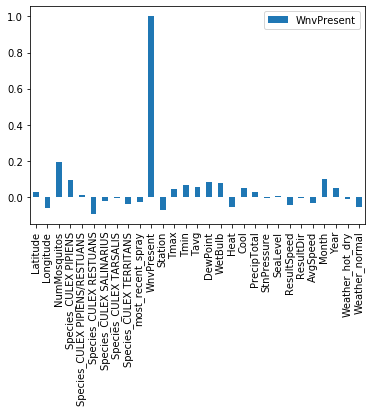

In [5]:
train.corr()[['WnvPresent']].plot.bar()

In [6]:
train.corr()[['WnvPresent']].sort_values(by='WnvPresent',ascending=False)

,WnvPresent
WnvPresent,1.000000
NumMosquitos,0.196820
Month,0.100143
Species_CULEX PIPIENS,0.096206
DewPoint,0.082685
WetBulb,0.077539
Tmin,0.065705
Tavg,0.059897
Cool,0.053347
Year,0.050865


The NumMosquitos feature has the higest correlation with the target variable. The correlation of all variables are very low, with the highest correlation being only 0.196, this is probably due to the low number of observations which have the virus. 



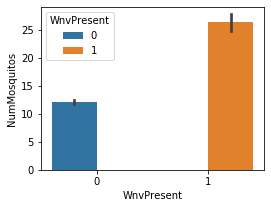

In [7]:
plt.subplots(figsize=(4,3))
sns.barplot('WnvPresent','NumMosquitos',data=train,hue='WnvPresent')

The chart above indicates that the higher the number of mosquitoes found in the trap, the higher the chances of finding a mosquito with the WNV. However, we might not be able to use this feature for future predictions as we will only get this data at the point of collecting the trap results, which will also show us if the virus is present in the trap

Now we will visualize the presence of the virus by species of mosquito in the trap

In [8]:
c = [c for c in train.columns if "Species" in c]

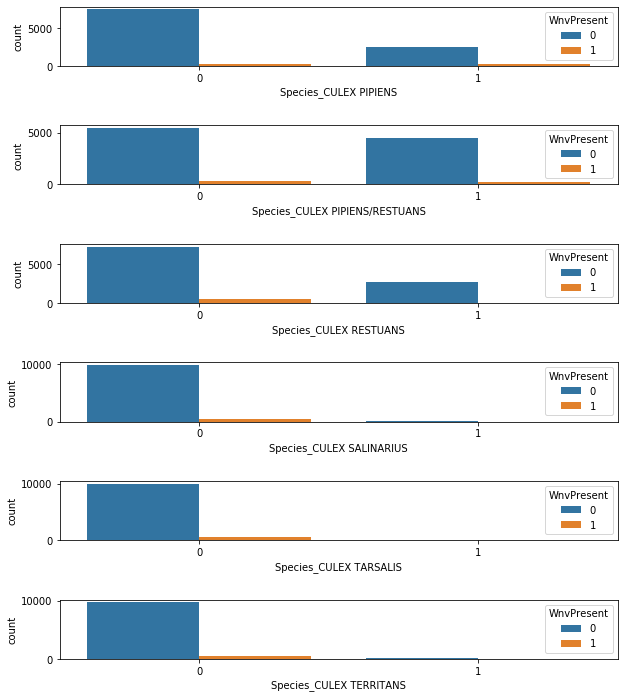

In [9]:
f, axes = plt.subplots(6,figsize=(10,12))
plt.subplots_adjust(hspace = 1)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(loc='upper right')
for i in range(len(c)):
    g = sns.countplot(c[i],data=train,hue='WnvPresent',ax=axes[i])
    g.legend(loc='upper right',title='WnvPresent')

From these plots, we can see that CULEX SALINARIUS, CULEX TARSALIS & CULEX TERRITANS have very few observations

In [10]:
train['Species_CULEX SALINARIUS'].value_counts()

0    10420
1       86
Name: Species_CULEX SALINARIUS, dtype: int64

In [11]:
train.loc[(train['Species_CULEX SALINARIUS']==1)&(train['WnvPresent']==1)]

,Date,Latitude,Longitude,NumMosquitos,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,most_recent_spray,WnvPresent,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Month,Year,Weather_hot_dry,Weather_normal


In [12]:
train['Species_CULEX TARSALIS'].value_counts()

0    10500
1        6
Name: Species_CULEX TARSALIS, dtype: int64

In [13]:
train.loc[(train['Species_CULEX TARSALIS']==1)&(train['WnvPresent']==1)]

,Date,Latitude,Longitude,NumMosquitos,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,most_recent_spray,WnvPresent,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Month,Year,Weather_hot_dry,Weather_normal


In [14]:
train['Species_CULEX TERRITANS'].value_counts()


0    10284
1      222
Name: Species_CULEX TERRITANS, dtype: int64

In [15]:
train.loc[(train['Species_CULEX TERRITANS']==1)&(train['WnvPresent']==1)]

,Date,Latitude,Longitude,NumMosquitos,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,most_recent_spray,WnvPresent,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Month,Year,Weather_hot_dry,Weather_normal


When any of these 3 species have been present, the virus has not been detected

Let's look at the monthly breakdown of Wnv cases

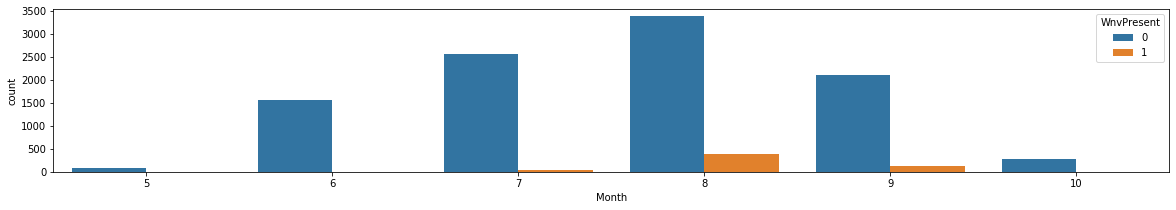

In [16]:
plt.subplots(figsize=(20,3))
sns.countplot('Month',data=train,hue='WnvPresent') 

September has the highest number of Wnv occurences, it also has the overall highest number of data points.

In [17]:
train.loc[(train['WnvPresent']==1)]['Month'].value_counts()

8     377
9     125
7      46
10      2
6       1
Name: Month, dtype: int64

Now let's visualise the relation between number of days since the last spray and occurences of the virus

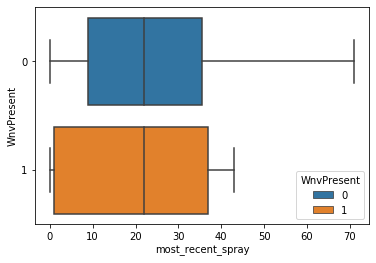

In [18]:
sns.boxplot(y='WnvPresent', x='most_recent_spray', hue='WnvPresent', data=train[(train['most_recent_spray']<100)], dodge=False,orient="h")

The above plot is for datapoints for which the last spray was within 100 days, within this range, the fewer the days since the last spray, the higher the occurence of the virus. This could be a result of sprays made after the virus was detected and the sprays taking a few days to take effect. 

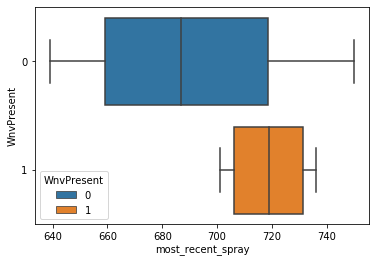

In [19]:
sns.boxplot(y='WnvPresent', x='most_recent_spray', hue='WnvPresent', data=train[(train['most_recent_spray']>100)&(train['most_recent_spray']<3600)], dodge=False,orient="h")

For locations where the last spray was done more than 100 days ago, the more recent the spray, the fewer occurances of the virus.

### Weather data exploration

The weather features do not have a significant correlation with the target. It could be useful to add the previous 14 days weather data to the dataset as the presence of the virus on a particular day would be more dependent on the previous days' weather than the current day's weather.

In [20]:
weather = pd.read_csv('output/Weather_FE.csv') # Please refer to WeatherDataEng.ipynb for function that engineers this dataset

This dataset contains summaries for the 14 preceeding days for which feature. The summary includes the following:

1. 14 day Min
2. 14 day Max
3. 14 day average
4. Std Deviation for the 14 days

Let's see if these features have a higher correlation with the target variable


In [21]:
weather.tail()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tmax14_days_Min,Tmax14_days_Max,Tmax14_days_Avg,Tmax14_days_Std_dev,Tmin14_days_Min,Tmin14_days_Max,Tmin14_days_Avg,Tmin14_days_Std_dev,Tavg14_days_Min,Tavg14_days_Max,Tavg14_days_Avg,Tavg14_days_Std_dev,DewPoint14_days_Min,DewPoint14_days_Max,DewPoint14_days_Avg,DewPoint14_days_Std_dev,WetBulb14_days_Min,WetBulb14_days_Max,WetBulb14_days_Avg,WetBulb14_days_Std_dev,Heat14_days_Min,Heat14_days_Max,Heat14_days_Avg,Heat14_days_Std_dev,Cool14_days_Min,Cool14_days_Max,Cool14_days_Avg,Cool14_days_Std_dev,PrecipTotal14_days_Min,PrecipTotal14_days_Max,PrecipTotal14_days_Avg,PrecipTotal14_days_Std_dev,StnPressure14_days_Min,StnPressure14_days_Max,StnPressure14_days_Avg,StnPressure14_days_Std_dev,SeaLevel14_days_Min,SeaLevel14_days_Max,SeaLevel14_days_Avg,SeaLevel14_days_Std_dev,ResultSpeed14_days_Min,ResultSpeed14_days_Max,ResultSpeed14_days_Avg,ResultSpeed14_days_Std_dev,ResultDir14_days_Min,ResultDir14_days_Max,ResultDir14_days_Avg,ResultDir14_days_Std_dev,AvgSpeed14_days_Min,AvgSpeed14_days_Max,AvgSpeed14_days_Avg,AvgSpeed14_days_Std_dev
2920,2,2014-10-27,79,54,67,52,59.0,0,2,0.020,29.00,29.67,12.7,19,13.6,52,75,62.357143,6.782330,36,59,48.285714,6.633250,46,65,55.642857,5.830952,33,61,45.785714,8.124038,44,62.0,50.500000,5.827653,0,19,9.357143,5.830952,0,0,0.000000,0.0,0,1.18,0.123143,0.325707,28.89,29.62,29.262143,0.210061,29.54,30.3,29.930000,0.215549,1.6,11.0,6.728571,3.161652,11,36,23.500000,9.000000,5.1,12.7,8.700000,2.166884
2921,2,2014-10-28,66,48,57,40,48.0,8,0,0.030,29.23,29.85,14.0,26,14.6,52,79,62.928571,7.810250,36,54,47.928571,6.164414,46,67,55.785714,6.082763,33,59,45.142857,7.141428,44,60.0,50.285714,5.412643,0,19,9.357143,5.830952,0,2,0.142857,0.0,0,1.18,0.093143,0.313387,28.89,29.62,29.260000,0.212748,29.54,30.3,29.925714,0.220374,1.6,12.7,7.100000,3.541838,11,36,23.785714,8.774964,5.1,13.6,9.035714,2.533349
2922,2,2014-10-29,49,40,45,34,42.0,20,0,0.000,29.42,30.07,8.5,29,9.0,52,79,62.857143,7.745967,36,54,47.500000,5.916080,46,67,55.500000,5.916080,33,53,43.785714,6.000000,44,59.0,49.428571,4.652779,0,19,9.642857,5.656854,0,2,0.142857,0.0,0,0.07,0.011000,0.019639,29.00,29.62,29.284286,0.184837,29.67,30.3,29.947857,0.192441,1.6,14.0,7.971429,3.637080,11,36,24.785714,8.124038,5.1,14.6,9.464286,2.930373
2923,2,2014-10-30,53,37,45,35,42.0,20,0,0.002,29.41,30.10,5.9,23,6.5,49,79,62.214286,8.544004,36,54,46.571429,6.000000,45,67,54.714286,6.557439,33,52,42.428571,5.916080,42,59.0,48.571429,4.847113,0,20,10.428571,6.244998,0,2,0.142857,0.0,0,0.03,0.006000,0.010015,29.00,29.62,29.307143,0.180018,29.67,30.3,29.971429,0.185093,1.6,14.0,7.907143,3.617790,11,36,24.357143,7.681146,5.1,14.6,9.414286,2.932014
2924,2,2014-10-31,49,34,42,29,36.0,23,0,0.040,29.54,30.20,21.7,34,22.6,49,79,61.857143,8.831761,36,54,45.428571,6.164414,45,67,53.928571,7.000000,33,52,41.214286,5.567764,42,59.0,47.785714,4.964157,0,20,11.214286,6.782330,0,2,0.142857,0.0,0,0.03,0.006000,0.010015,29.00,29.62,29.330000,0.170384,29.67,30.3,29.995000,0.178358,1.6,14.0,7.942857,3.593523,11,36,24.214286,7.681146,5.1,14.6,9.278571,3.025069


In [22]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [23]:
weather['Date'] = pd.to_datetime(weather['Date'])
#weather.fillna(0,inplace=True)
train = train.merge(weather,left_on=["Date",'Station'],right_on=["Date",'Station'],how='left',suffixes=('', '_y'))
drops = [c for c in train.columns if "_y" in c]
train.drop(drops,axis=1,inplace=True)

In [24]:
train.corr()['WnvPresent'].sort_values(ascending=False)

WnvPresent                        1.000000
NumMosquitos                      0.196820
WetBulb14_days_Max                0.133472
DewPoint14_days_Avg               0.128940
WetBulb14_days_Avg                0.119539
DewPoint14_days_Max               0.113868
DewPoint14_days_Min               0.105237
Month                             0.100143
Species_CULEX PIPIENS             0.096206
Tmin14_days_Avg                   0.093486
Tavg14_days_Avg                   0.090624
Cool14_days_Max                   0.086803
Tavg14_days_Max                   0.086785
Cool14_days_Avg                   0.085329
Tmax14_days_Min                   0.084802
Tavg14_days_Min                   0.084695
Tmin14_days_Min                   0.084298
Tmax14_days_Max                   0.083005
DewPoint                          0.082685
Tmax14_days_Avg                   0.082660
Tmin14_days_Max                   0.080201
WetBulb14_days_Min                0.079333
WetBulb                           0.077539
PrecipTotal

The 14 day summary features have a significantly higher correlation with the target variable than the daily data themselves. We will use them going forward. The "PrecipTotal14_days_Min" feature has a Nan correlation because it is always 0 as there was never a 14 day period without a day of 0 percipiration. This column can be removed

In [25]:
train.drop("PrecipTotal14_days_Min",axis=1,inplace=True)

### Polynomial Feature Engineering

We can create some polynomial features of the summary columns with a high correlation with the target variables

In [26]:
abs(train.corr()['WnvPresent']).sort_values(ascending=False)[:13]

WnvPresent                    1.000000
NumMosquitos                  0.196820
ResultSpeed14_days_Std_dev    0.146791
AvgSpeed14_days_Max           0.145712
ResultSpeed14_days_Max        0.142715
WetBulb14_days_Max            0.133472
AvgSpeed14_days_Std_dev       0.131654
DewPoint14_days_Avg           0.128940
WetBulb14_days_Avg            0.119539
DewPoint14_days_Max           0.113868
AvgSpeed14_days_Avg           0.113722
ResultSpeed14_days_Avg        0.110494
DewPoint14_days_Min           0.105237
Name: WnvPresent, dtype: float64

In [27]:
cols = abs(train.corr()['WnvPresent']).sort_values(ascending=False)[:13].index


In [28]:
cols = [c for c in cols if c not in ['WnvPresent','NumMosquitos']]

In [29]:
for c in cols:
    train[c+"^2"] = train[c]**2
    train[c+"^3"] = train[c]**3
    
train.drop("NumMosquitos",axis=1,inplace=True)

Save train dataset and make feature engineering changes to Test dataset

In [30]:
train.to_csv("output/train_fe.csv",index=False)

In [31]:
test = pd.read_csv("output/test.csv")
test['Date'] = pd.to_datetime(test['Date'])

In [32]:
test = test.merge(weather,left_on=["Date",'Station'],right_on=["Date",'Station'],how='left',suffixes=('', '_y'))
drops = [c for c in test.columns if "_y" in c]
test.drop(drops,axis=1,inplace=True)

In [33]:
for c in cols:
    test[c+"^2"] = test[c]**2
    test[c+"^3"] = test[c]*output/test_fe*3

In [34]:
#test[:5].to_csv("output/test_fe.csv",index=False)

In [35]:
import pickle
test.to_pickle('output/test_fe.pickle')